In [11]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pprint as pprint

In [12]:
file = "by1.csv"

In [13]:
df=pd.read_csv(file)


In [14]:
df2=df.dropna()
df2=df.dropna(axis=0)
df2=df.dropna().reset_index(drop=True)
df2=df.dropna(how='all')
df2=df.dropna(subset=['Average House 2020'])
df2.head(100)

,Region ID,State Name,Region Name,Average House 2020
0,6181,NY,New York,"$535,891.61"
1,12447,CA,Los Angeles,"$713,112.18"
2,39051,TX,Houston,"$192,784.58"
3,17426,IL,Chicago,"$226,676.80"
4,6915,TX,San Antonio,"$192,655.20"
...,...,...,...,...
95,32931,IL,Montgomery,"$95,764.71"
96,25981,OR,Moreno Valley,"$393,376.01"
97,7353,CA,Syracuse,"$121,049.46"
98,45457,NY,Glendale,"$841,650.70"


In [15]:
df2["Average House 2020"] = df2["Average House 2020"].replace("[$,]", "", regex=True).astype(float)
df2.groupby(["State Name"])["Average House 2020"].mean()

C:\Users\k3net\AppData\Local\Temp\ipykernel_17580\1430376347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Average House 2020"] = df2["Average House 2020"].replace("[$,]", "", regex=True).astype(float)


State Name
CA    270515.353973
CO    233918.030731
DC    586893.330000
FL    266911.834896
HI    238363.856393
IL    216374.782012
LA    253511.451434
MA    253641.566925
MN    219008.279521
NC    251709.244299
NJ    274533.733822
NV    277547.424286
NY    245280.875817
OH    238230.618988
OR    228513.361412
RI    251933.778810
TN    229880.167351
TX    224061.732245
WA    248881.719022
Name: Average House 2020, dtype: float64

In [16]:
df2["Average House 2020"] = df2["Average House 2020"].replace("[$,]", "", regex=True).astype(float)
df2.groupby(["Region Name","State Name"])["Average House 2020"].mean()

C:\Users\k3net\AppData\Local\Temp\ipykernel_17580\2655787364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Average House 2020"] = df2["Average House 2020"].replace("[$,]", "", regex=True).astype(float)


Region Name    State Name
Aaronsburg     TN            192404.65
Abbeville      FL            109138.29
Abbot          IL            120583.02
Abbotsford     NY            112974.74
Abbyville      IL             75458.29
                               ...    
Zirconia       MN            288455.11
Zolfo Springs  CA            155042.88
Zuni           TN            225217.28
Zwingle        WA            242302.86
Zwolle         TX            128641.71
Name: Average House 2020, Length: 8797, dtype: float64

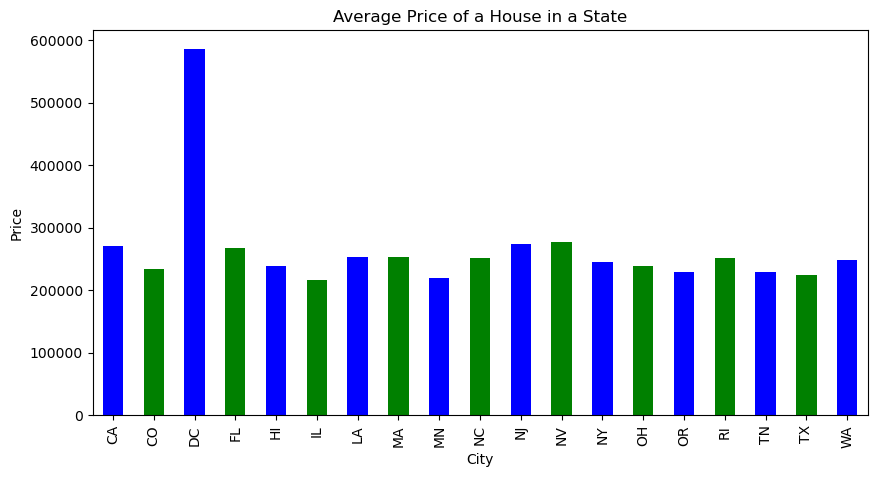

In [17]:
price_state = df2.groupby(['State Name'])['Average House 2020'].agg('mean')
ax = price_state.plot(kind = "bar", color=['blue', "green"])
ax.set_ylabel('Price')
ax.set_xlabel("City")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Price of a House in a State')
plt.show()

## ---------------------------------------------

In [18]:
city_of = ['Asheville',
 'Austin',
 'Twin Cities MSA',
 'Seattle',
 'Santa Cruz County',
 'San Mateo County',
 'San Francisco',
 'San Diego',
 'San Clara Country',
 'Salem',
 'Rhode Island',
 'Portland',
 'Pacific Grove',
 'Oakland',
 'New York City',
 'New Orleans',
 'Nashville',
 'Los Angeles',
 'Jersey City',
 'Hawaii',
 'Denver',
 'Columbus',
 'Clark County',
 'Chicago',
 'Cambridge',
 'Broward County',
 'Boston',
 'Washington D.C.']

In [19]:
df2.loc[df2["Region Name"].isin(city_of)]

,Region ID,State Name,Region Name,Average House 2020
1,12447,CA,Los Angeles,713112.18
3,17426,IL,Chicago,226676.80
6,54296,CA,San Diego,655711.79
8,10221,TX,Austin,403375.11
12,20330,CA,San Francisco,1266652.80
14,10920,OH,Columbus,168951.67
16,16037,WA,Seattle,728021.05
17,13373,OR,Portland,455633.60
18,11093,CO,Denver,457879.29
21,44269,MA,Boston,602130.15


In [20]:
values=['Asheville',"Austin","Chicago","New York","Los Angeles","Hawaii"]
print(df[df["Region Name"].isin(values)])

      Region ID State Name  Region Name Average House 2020
0          6181         NY     New York       $535,891.61 
1         12447         CA  Los Angeles       $713,112.18 
3         17426         IL      Chicago       $226,676.80 
8         10221         TX       Austin       $403,375.11 
239       50779         CA    Asheville       $310,639.55 
1522      23555         OH       Austin       $115,937.93 
3376      37227         LA       Austin       $161,700.31 
6987      48777         NY       Austin        $74,526.03 
9155       3488         MN       Austin        $66,396.41 
